In [1]:
from glob import glob

from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tqdm'

SyntaxError: invalid syntax (2765566465.py, line 1)

In [3]:
glob("구미버스_이벤트_로그/gm_busevent*/gm_busevent.csv")

['구미버스_이벤트_로그\\gm_busevent\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (1) (2)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (10)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (11)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (12)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (13)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (14)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (15)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (16)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (17)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (18)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (19)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (2)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (20)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (21)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (22)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (23)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (24)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (25)\\gm_busevent.csv',
 '구미버스_이벤트_로그\\gm_busevent (26)\\g

In [4]:
res = []
for path in glob("구미버스_이벤트_로그/gm_busevent*/gm_busevent.csv"):
   df = pd.read_csv(path)
   res.append(df)

In [5]:
print(res[:2])

[      BRT_ID BRT_DIRECTION  BRT_CLASS   BRN_IN_OCCURYMDHMS  \
0        140            순환          0  2021-11-10 01:59:15   
1      380-1           정방향          0  2021-11-10 03:11:07   
2        885           정방향          0  2021-11-10 06:06:23   
3       95-1           정방향          1  2021-11-10 06:06:25   
4        172           역방향          0  2021-11-10 06:06:36   
...      ...           ...        ...                  ...   
17869     26           정방향          0  2021-11-10 09:44:48   
17870  380-1           정방향          0  2021-11-10 11:43:30   
17871    181           정방향          0  2021-11-10 17:38:30   
17872  380-1           정방향          0  2021-11-10 17:52:18   
17873    140            순환          0  2021-11-10 19:06:21   

       BRN_OUT_OCCURYMDHMS      BNODE_KNAME     BNODE_X    BNODE_Y  
0      2021-11-10 01:59:26        푸르지오캐슬B단지  128.336100  36.124709  
1      2021-11-10 03:11:16            각산네거리  128.434978  36.154153  
2      2021-11-10 06:07:03           금오산사거리  12

In [6]:
df = pd.concat(res,ignore_index=True)

In [7]:
df.shape

(1225348, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225348 entries, 0 to 1225347
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   BRT_ID               1225348 non-null  object 
 1   BRT_DIRECTION        1225348 non-null  object 
 2   BRT_CLASS            1225348 non-null  int64  
 3   BRN_IN_OCCURYMDHMS   1225348 non-null  object 
 4   BRN_OUT_OCCURYMDHMS  1225348 non-null  object 
 5   BNODE_KNAME          1213843 non-null  object 
 6   BNODE_X              1225348 non-null  float64
 7   BNODE_Y              1225348 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 74.8+ MB


In [9]:
df.isna().sum()

BRT_ID                     0
BRT_DIRECTION              0
BRT_CLASS                  0
BRN_IN_OCCURYMDHMS         0
BRN_OUT_OCCURYMDHMS        0
BNODE_KNAME            11505
BNODE_X                    0
BNODE_Y                    0
dtype: int64

In [10]:
# min max로 조회한 기간(10월 2일 - 11월 10일) 데이터가 들어왔는지 확인
display(
   df.BRN_IN_OCCURYMDHMS.max(),
   df.BRN_IN_OCCURYMDHMS.min())

'2021-11-10 19:06:21'

'2021-10-02 05:35:47'

In [12]:
# column name change to korean
df = df.rename(columns={"BRT_ID": "버스노선_이름", "BRT_DIRECTION": "버스노선_방향", "BRT_CLASS": "버스노선_경유코드"
                   , "BRN_IN_OCCURYMDHMS": "도착시간", "BRN_OUT_OCCURYMDHMS": "출발시간", "BNODE_KNAME": "정류장_이름"
                   , "BNODE_X": "경도", "BNODE_Y": "위도"}) 

In [13]:
df.head(2)

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도
0,140,순환,0,2021-11-10 01:59:15,2021-11-10 01:59:26,푸르지오캐슬B단지,128.336100,36.124709
1,380-1,정방향,0,2021-11-10 03:11:07,2021-11-10 03:11:16,각산네거리,128.434978,36.154153


In [ ]:
# null 확인
df.isna().sum()

BRT_ID                     0
BRT_DIRECTION              0
BRT_CLASS                  0
BRN_IN_OCCURYMDHMS         0
BRN_OUT_OCCURYMDHMS        0
BNODE_KNAME            11505
BNODE_X                    0
BNODE_Y                    0
dtype: int64

In [32]:
df[df.정류장_이름.isna()].head()

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도


In [14]:
df[(df.정류장_이름.isna()) & (df.버스노선_이름 == '5000')][['경도','위도']].value_counts()

경도          위도       
128.434978  36.154153    1493
Name: count, dtype: int64

In [15]:
df = df.dropna(axis=0)
df.shape

(1213843, 8)

In [16]:
# 910번 데이터 확인 -> O
df[df.버스노선_이름 == '910']

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도
3867,910,정방향,0,2021-11-10 07:08:04,2021-11-10 07:10:18,구미역,128.329321,36.129635
4153,910,정방향,0,2021-11-10 07:10:46,2021-11-10 07:11:13,농협,128.333200,36.128023
4245,910,정방향,0,2021-11-10 07:11:45,2021-11-10 07:13:43,금오산사거리,128.335880,36.126888
4457,910,정방향,0,2021-11-10 07:13:57,2021-11-10 07:14:04,원평동 행정복지센터 건너,128.337874,36.126044
4473,910,정방향,0,2021-11-10 07:14:09,2021-11-10 07:14:19,금오시장 건너,128.339623,36.125278
...,...,...,...,...,...,...,...,...
1214392,910,역방향,0,2021-10-17 08:26:45,2021-10-17 08:26:53,송원고가밑(구미역방면),128.343969,36.123412
1214422,910,역방향,0,2021-10-17 08:27:13,2021-10-17 08:27:19,금오시장 입구,128.340973,36.124741
1214440,910,역방향,0,2021-10-17 08:27:26,2021-10-17 08:27:49,원평동 행정복지 센터 앞,128.338893,36.125819
1214481,910,역방향,0,2021-10-17 08:28:04,2021-10-17 08:28:28,대구은행앞,128.335663,36.127183


In [17]:
# 버스노선_경유코드: 경유노선 구분 의미 파악
df.버스노선_경유코드.value_counts()

버스노선_경유코드
0    1005225
1      78747
2      61597
3      28861
4      20744
5       8689
6       6356
7       1783
9       1492
8        349
Name: count, dtype: int64

In [18]:
# 같은 버스인데도 경유코드가 다른 경우가 있음. 의미는 잘..
df[df.버스노선_경유코드 == 5].버스노선_이름.value_counts()

버스노선_이름
340-4    3179
11       1825
410-1    1384
411-6    1190
360-3    1111
Name: count, dtype: int64

In [19]:
# 버스노선 방향은 정방향과 역방향, 순환이 있음
df.버스노선_방향.value_counts()

버스노선_방향
정방향    478013
역방향    460350
순환     275480
Name: count, dtype: int64

In [20]:
# 도착시간과 출발시간을 날짜 data로 변환 -> 데이터 효율 올리고 날짜 함수(dt.month)를 사용하기 위해
df.도착시간 = pd.to_datetime(df.도착시간)
df.출발시간 = pd.to_datetime(df.출발시간)

### ***910번 구간_걸린시간 구하기***

In [21]:
# 정방향, 역방향, 순환의 의미
# 910번의 정방향: 구미역 -> 옥계
df[(df.버스노선_이름 == '910') & (df.버스노선_방향 == '정방향')]

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도
3867,910,정방향,0,2021-11-10 07:08:04,2021-11-10 07:10:18,구미역,128.329321,36.129635
4153,910,정방향,0,2021-11-10 07:10:46,2021-11-10 07:11:13,농협,128.333200,36.128023
4245,910,정방향,0,2021-11-10 07:11:45,2021-11-10 07:13:43,금오산사거리,128.335880,36.126888
4457,910,정방향,0,2021-11-10 07:13:57,2021-11-10 07:14:04,원평동 행정복지센터 건너,128.337874,36.126044
4473,910,정방향,0,2021-11-10 07:14:09,2021-11-10 07:14:19,금오시장 건너,128.339623,36.125278
...,...,...,...,...,...,...,...,...
1210142,910,정방향,0,2021-10-17 07:36:03,2021-10-17 07:37:22,골드클래스앞,128.428267,36.157383
1210332,910,정방향,0,2021-10-17 07:38:04,2021-10-17 07:38:17,우미린센트럴파크 후문,128.431160,36.161066
1210391,910,정방향,0,2021-10-17 07:38:47,2021-10-17 07:38:56,우미린풀하우스건너,128.436179,36.161001
1210428,910,정방향,0,2021-10-17 07:39:11,2021-10-17 07:39:26,인덕중학교건너,128.438741,36.161121


In [22]:
# 910번의 역방향: 옥계 -> 구미역
df[(df.버스노선_이름 == '910') & (df.버스노선_방향 == '역방향')]

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도
8547,910,역방향,0,2021-11-10 07:57:14,2021-11-10 07:57:31,인덕중흥S클래스앞,128.442235,36.164035
8681,910,역방향,0,2021-11-10 07:58:50,2021-11-10 07:59:10,중흥S클래스에코시티,128.438975,36.161346
8805,910,역방향,0,2021-11-10 08:00:23,2021-11-10 08:00:53,우미린풀하우스정문,128.436067,36.161346
8893,910,역방향,0,2021-11-10 08:01:16,2021-11-10 08:01:28,우미린센트럴파크 후문건너,128.432100,36.161337
9110,910,역방향,0,2021-11-10 08:03:41,2021-11-10 08:04:04,골드클래스건너,128.428001,36.157399
...,...,...,...,...,...,...,...,...
1214392,910,역방향,0,2021-10-17 08:26:45,2021-10-17 08:26:53,송원고가밑(구미역방면),128.343969,36.123412
1214422,910,역방향,0,2021-10-17 08:27:13,2021-10-17 08:27:19,금오시장 입구,128.340973,36.124741
1214440,910,역방향,0,2021-10-17 08:27:26,2021-10-17 08:27:49,원평동 행정복지 센터 앞,128.338893,36.125819
1214481,910,역방향,0,2021-10-17 08:28:04,2021-10-17 08:28:28,대구은행앞,128.335663,36.127183


In [23]:
# 910번 버스 다른 날짜 데이터 확인
display(df[df.버스노선_이름 == '910']['도착시간'].min()
,df[df.버스노선_이름 == '910']['도착시간'].max())


Timestamp('2021-10-12 09:54:04')

Timestamp('2021-11-10 09:40:22')

In [125]:
# 910번 버스의 구간_이름과 구간_걸린시간 구하기
bus910 = df[(df.버스노선_이름 == '910')].sort_values(['도착시간', '버스노선_이름', '버스노선_방향'], ascending=(1,1,1)).reset_index(drop=True)
bus910['구간_이름'] = bus910.정류장_이름 + " - " + bus910.정류장_이름.shift(-1)
bus910['구간_걸린시간'] = bus910.도착시간.shift(-1) - bus910.도착시간

In [126]:
# bus910 확인
bus910.head()

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,이름_방향,구간_이름,구간_걸린시간
0,910,정방향,0,2021-10-12 09:54:04,2021-10-12 09:54:30,양호동빈수골(금오공대입구방면),910_정방향,양호동빈수골(금오공대입구방면) - 옥계중학교건너,0 days 00:02:33
1,910,정방향,0,2021-10-12 09:56:37,2021-10-12 09:56:46,옥계중학교건너,910_정방향,옥계중학교건너 - 옥계대우아파트건너,0 days 00:00:28
2,910,정방향,0,2021-10-12 09:57:05,2021-10-12 09:57:31,옥계대우아파트건너,910_정방향,옥계대우아파트건너 - 4공단입구(옥계방면),0 days 00:01:50
3,910,정방향,0,2021-10-12 09:58:55,2021-10-12 09:59:55,4공단입구(옥계방면),910_정방향,4공단입구(옥계방면) - 옥계부영아파트건너,0 days 00:01:21
4,910,정방향,0,2021-10-12 10:00:16,2021-10-12 10:00:46,옥계부영아파트건너,910_정방향,옥계부영아파트건너 - 옥계성당,0 days 00:01:44


float64
구간_걸린시간
2800.383333     1
2276.450000     1
1532.166667     1
1415.633333     1
1394.816667     1
               ..
1.083333       36
1.066667       25
1.050000       20
1.033333       25
1.016667       21
Name: count, Length: 392, dtype: int64


<Axes: xlabel='구간_걸린시간', ylabel='Count'>

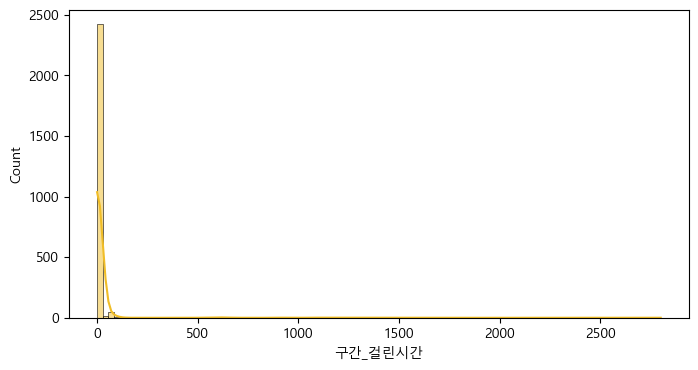

In [ ]:
import seaborn as sns

# 한글 폰트 적용
import matplotlib.font_manager as fm
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 구간_걸린시간 값 확인
total_second = bus910.구간_걸린시간.dt.total_seconds() / 60
print(total_second.dtype)
filtered_s = total_second[(total_second > 1)]
print(filtered_s.value_counts().sort_index(ascending=0))
print(f"")
# 사용자 정의 색상 팔레트 (그라데이션 적용)
color = "#F0BD27"

# 시각화
plt.figure(figsize=(8, 4))
sns.histplot(filtered_s, kde=True, bins=100, color=color)


In [ ]:
# 값 확인
bus910['걸린시간_분'] = bus910.구간_걸린시간.dt.total_seconds() / 60
bus910[bus910.걸린시간_분 > 5].sort_values('걸린시간_분', ascending=0).head(3)

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,이름_방향,구간_이름,구간_걸린시간,걸린시간_분
671,910,역방향,0,2021-10-17 08:29:24,2021-10-17 08:29:35,구미역(중앙시장),910_역방향,구미역(중앙시장) - 구미역,1 days 22:40:23,2800.383333
3999,910,정방향,0,2021-11-02 20:10:41,2021-11-02 20:10:49,옥계성당,910_정방향,옥계성당 - 골드클래스앞,1 days 13:56:27,2276.450000
226,910,역방향,0,2021-10-14 08:47:22,2021-10-14 08:47:57,구미역 전(국민은행),910_역방향,구미역 전(국민은행) - 인덕중흥S클래스앞,1 days 01:32:10,1532.166667


In [132]:
bus910.iloc[3998:4002]

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,이름_방향,구간_이름,구간_걸린시간,걸린시간_분
3998,910,정방향,0,2021-11-02 20:09:28,2021-11-02 20:09:36,옥계부영아파트건너,910_정방향,옥계부영아파트건너 - 옥계성당,0 days 00:01:13,1.216667
3999,910,정방향,0,2021-11-02 20:10:41,2021-11-02 20:10:49,옥계성당,910_정방향,옥계성당 - 골드클래스앞,1 days 13:56:27,2276.450000
4000,910,정방향,0,2021-11-04 10:07:08,2021-11-04 10:07:12,골드클래스앞,910_정방향,골드클래스앞 - 쌍용예가더파크아파트건너,0 days 00:00:20,0.333333
4001,910,정방향,0,2021-11-04 10:07:28,2021-11-04 10:07:37,쌍용예가더파크아파트건너,910_정방향,쌍용예가더파크아파트건너 - 우미린센트럴파크 후문,0 days 00:00:33,0.550000


In [ ]:
# 구간 데이터 불러오기: 구간과 구간_걸린시간 데이터를 합치기
bus910_route = pd.read_excel("C:/Users/a/OneDrive/바탕 화면/개인/02. 데이터분석_Bootcamp/014. Gumi_Bus/910번 버스 구간별 거리.xlsx", sheet_name='Sheet1'
              , engine= 'openpyxl')

In [28]:
# 910번 구간과 걸린시간을 매핑
bus910_route_time = pd.merge(bus910_route, bus910, on= '구간_이름', how= 'left')

# 걸린시간이 na값인 구간의 이름을 출력
print(f"걸린시간이 없는 구간 리스트:\n {bus910_route_time[bus910_route_time.구간_걸린시간.isna()].구간_이름.values}")
print(f"걸린시간 값이 없는 구간의 수:\n {len(bus910_route_time[bus910_route_time.구간_걸린시간.isna()])}")

걸린시간이 없는 구간 리스트:
 ['오성예식장앞 - 구미IC네거리(구미경찰서방면)' '구미IC네거리(구미경찰서방면) - 구미경찰서건너'
 '우미린센트럴파크 후문 - 산동농협경제사업소앞' '산동농협경제사업소앞 - 산동보건지소앞' '산동보건지소앞 - 인덕리(확장단지방면)'
 '인덕리(확장단지방면) - 인덕중흥S클래스앞' '구미경찰서 - 구미IC네거리(구미종합터미널건너방면)'
 '구미IC네거리(구미종합터미널건너방면) - 구미종합터미널건너']
걸린시간 값이 없는 구간의 수:
 8


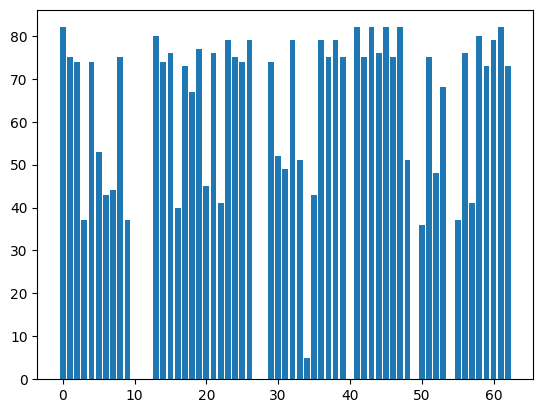

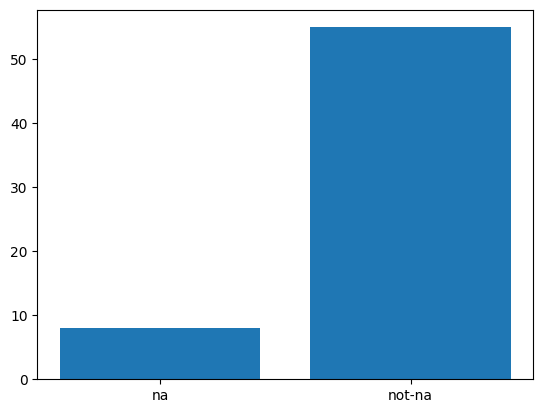

In [29]:
# 구간별 걸린시간의 수 구하기
time_count = bus910_route_time.groupby("구간_이름")["구간_걸린시간"].count()
plt.bar(range(len(time_count)), time_count.values)
plt.show()

# 걸린시간이 없는 구간, 있는 구간의 수를 막대 그래프로 그리기
plt.bar(['na', 'not-na'], [(time_count == 0).sum(), (time_count != 0).sum()])
plt.show()


### ***버스번호 변경 확인***

In [ ]:
# 필요한 데이터만 고르기
target_columns = ['버스노선_이름', '버스노선_방향', '버스노선_경유코드', '도착시간', '출발시간', '정류장_이름']
df = df[target_columns]
df.head(3)

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름
0,140,순환,0,2021-11-10 01:59:15,2021-11-10 01:59:26,푸르지오캐슬B단지
1,380-1,정방향,0,2021-11-10 03:11:07,2021-11-10 03:11:16,각산네거리
2,885,정방향,0,2021-11-10 06:06:23,2021-11-10 06:07:03,금오산사거리


In [ ]:
# 버스노선_이름, 버스노선_방향 같으면 같은 버스? 
# 노선ID (버스 구별자) 만들기

len(df.groupby(['버스노선_이름', '버스노선_방향']))

305

In [69]:
df['이름_방향'] = df.버스노선_이름 + '_' + df.버스노선_방향
df.head(3)

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,이름_방향
0,140,순환,0,2021-11-10 01:59:15,2021-11-10 01:59:26,푸르지오캐슬B단지,140_순환
1,380-1,정방향,0,2021-11-10 03:11:07,2021-11-10 03:11:16,각산네거리,380-1_정방향
2,885,정방향,0,2021-11-10 06:06:23,2021-11-10 06:07:03,금오산사거리,885_정방향


In [ ]:
# 고유한 노선 수: 305개
df.이름_방향.nunique()

305

In [ ]:
# 노선ID로 바꿀 버스번호_방향들
df.이름_방향.values

array(['140_순환', '380-1_정방향', '885_정방향', ..., '554_정방향', '554_정방향',
       '554_정방향'], dtype=object)

In [ ]:
# 현재 없는 버스번호?
# 버스번호 고유값 확인
df.버스노선_이름.unique()

array(['140', '380-1', '885', '95-1', '172', '12', '890', '92', '74',
       '55', '740', '195', '181', '11', '340', '180', '140-2', '190-3',
       '411-6', '171-4', '24', '26-2', '360', '410-7', '340-4', '185',
       '881', '110', '5000', '10', '171', '140-3', '187-1', '380', '90',
       '73-3', '187', '29', '891', '175', '74-2', '340-5', '410-3', '57',
       '162-1', '72-3', '192', '340-3', '53', '140-6', '20', '910-1',
       '885-1', '11-1', '93', '120', '411-4', '170', '140-1', '182-2',
       '94', '51', '193', '884-2', '411-5', '196', '21', '884', '78',
       '111', '553', '161', '52', '555-1', '404', '24-1', '260', '174-1',
       '72-6', '160', '20-1', '22', '185-2', '78-3', '730', '97', '27',
       '26', '184', '11-5', '360-2', '28-1', '80', '71', '83', '11-3',
       '5200', '182-1', '883', '70-3', '460', '162', '360-3', '380-2',
       '70-2', '188', '380-3', '340-1', '11-4', '910', '91', '95-2',
       '361', '183', '26-1', '303', '20-3', '60', '360-1', '170-2', '410

In [ ]:
# 현재 구미시 버스번호 고유값 조회
route_list = pd.read_csv('노선번호.csv')
route_list

,종점,막차시간,노선ID,노선번호,노선유형,기점,첫차시간
0,구미역(중앙시장),2146,GMB19120,191,일반버스,옥계이편한세상APT앞,908
1,해평버스정류장,2150,GMB19210,192,좌석버스,구미역,835
2,구미역(중앙시장),2253,GMB19220,192,좌석버스,해평버스정류장,625
3,장천버스터미널 종점,1853,GMB193-210,193-2,일반버스,구미역,1853
4,구미역(중앙시장),2000,GMB193-220,193-2,일반버스,장천버스터미널 종점,2000
...,...,...,...,...,...,...,...
335,사곡역,2148,GMB96020,960,좌석버스,경운대학교(구미운전면허센터),728
336,산동농공단지입구,1050,GMB9631,96,좌석버스,산동농공단지입구,1050
337,산동농공단지입구,1750,GMB9632,96,좌석버스,산동농공단지입구,1750
338,장천버스터미널 종점,1600,GMB9710,97,일반버스,금오공대입구(옥계중학교방면),645


In [ ]:
# 버스번호 업데이트 확인: 10개의 버스번호가 변경됨

past_bus = set(df.버스노선_이름.unique())
print(len(past_bus))
now_bus = set(route_list.노선번호.unique())
changed_bus = past_bus - now_bus
print(len(changed_bus))

207
10


### ***다른 노선도 910번처럼 노선과 걸린시간 구하기***

In [70]:
df.head(3)

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,이름_방향
0,140,순환,0,2021-11-10 01:59:15,2021-11-10 01:59:26,푸르지오캐슬B단지,140_순환
1,380-1,정방향,0,2021-11-10 03:11:07,2021-11-10 03:11:16,각산네거리,380-1_정방향
2,885,정방향,0,2021-11-10 06:06:23,2021-11-10 06:07:03,금오산사거리,885_정방향


In [ ]:
# 이름_방향으로 데이터프레임 구분
# 도착시간별로도 끊어야 할 듯? 시간 차이가 10분 이상 지나는 것은 이상치 -> 도착시간과 도착시간 차이가 10분 이하인 행들만 하나의 데이터 프레임으로 만들기
res=[]
for route in unique_route:
   route_log = df[df.이름_방향 == route].sort_values('도착시간')
   route_log['구간_이름'] = route_log.정류장_이름 + " - " + route_log.정류장_이름.shift(-1)
   route_log['구간_걸린시간'] = route_log.도착시간.shift(-1) - route_log.도착시간
   res.route_log


array(['140_순환', '380-1_정방향', '885_정방향', '95-1_정방향', '172_역방향', '12_정방향',
       '890_정방향', '92_정방향', '74_정방향', '55_정방향', '740_정방향', '195_정방향',
       '181_정방향', '11_정방향', '340_순환', '180_정방향', '140-2_순환', '190-3_정방향',
       '411-6_순환', '171-4_정방향', '24_정방향', '26-2_순환', '360_정방향',
       '410-7_정방향', '340-4_순환', '185_정방향', '881_정방향', '110_정방향',
       '5000_역방향', '10_역방향', '171_정방향', '140-3_순환', '187-1_순환', '380_정방향',
       '90_정방향', '5000_정방향', '73-3_정방향', '187_순환', '29_정방향', '891_정방향',
       '11_역방향', '175_정방향', '74-2_정방향', '340-5_정방향', '410-3_순환', '57_정방향',
       '162-1_정방향', '72-3_순환', '192_역방향', '340-3_순환', '53_역방향',
       '140-6_순환', '20_순환', '910-1_정방향', '885-1_정방향', '11-1_순환', '93_정방향',
       '10_정방향', '120_정방향', '411-4_순환', '170_정방향', '90_역방향', '74_역방향',
       '140-1_순환', '182-2_정방향', '94_정방향', '51_순환', '193_정방향', '884-2_정방향',
       '411-5_순환', '196_정방향', '21_순환', '884_역방향', '78_순환', '111_역방향',
       '553_역방향', '161_정방향', '52_정방향', '555-1_정방향', '404_순환', '29_역방향',
    

In [ ]:
# 910번 버스의 구간_이름과 구간_걸린시간 구하기
bus910 = df[(df.버스노선_이름 == '910')].sort_values(by='도착시간').reset_index(drop=True)
bus910['구간_이름'] = bus910.정류장_이름 + " - " + bus910.정류장_이름.shift(-1)
bus910['구간_걸린시간'] = bus910.도착시간.shift(-1) - bus910.도착시간